In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

[7.7e+08 0.0e+00]
[ 7.43525949e+08 -3.68617185e+03]
[ 7.10962345e+08 -5.30722454e+03]
[ 6.81854380e+08 -6.74481594e+02]
[ 6.56818138e+08 -1.75859734e+03]
[ 6.25948682e+08 -5.75829940e+03]
[ 5.94413654e+08 -2.33866280e+03]
[ 5.69100484e+08 -3.35767620e+02]
[ 5.40819795e+08 -4.92494220e+03]
[ 5.08050054e+08 -4.24810954e+03]
[ 4.80869095e+08 -5.41535981e+01]
[ 4.54913766e+08 -3.17993656e+03]
[ 4.22653980e+08 -5.54867373e+03]
[ 3.92849886e+08 -1.03972898e+03]
[ 3.67916312e+08 -1.30387154e+03]
[ 3.37683035e+08 -5.65857718e+03]
[ 3.05673859e+08 -2.85161876e+03]
[ 2.80001377e+08 -1.35962686e+02]
[ 2.52404647e+08 -4.52865707e+03]
[ 2.19594837e+08 -4.67931475e+03]
[ 1.91753316e+08 -1.98647774e+02]
[ 1.66223773e+08 -2.66435777e+03]
[ 1.34375923e+08 -5.70523823e+03]
[ 1.03905504e+08 -1.46388604e+03]
[ 7.89490775e+07 -8.99631677e+02]
[ 4.93954689e+07 -5.47046536e+03]
[ 1.70122714e+07 -3.36570157e+03]
[-9.12147992e+06 -2.38893630e+01]
[-3.60748421e+07 -4.08001653e+03]
[-6.87990603e+07 -5.05335993e+

Text(0, 0.5, 'dRadius')

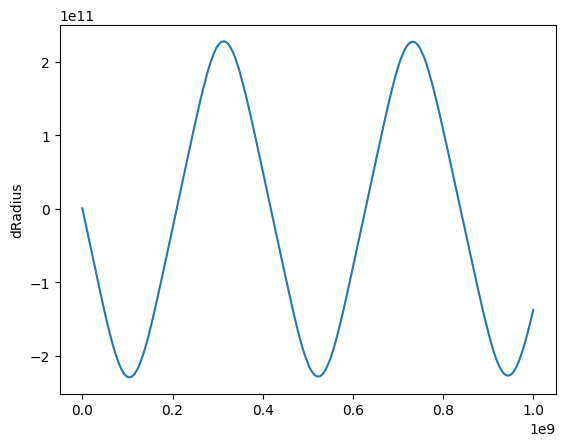

In [22]:
G = 6.67e-11
rho0 = 1e5
C = 10e-11
Ohm = 1e-8
Msun = 1e30
Rsun = 7e8
sigma = 5.67e-8




class Star(object):
    def __init__(self,M,R):
        self.M = M
        self.R = R

    def __call__(self,init,t):
        # def rho(self,r):
        #     return(rho0 * (1 - (r/self.R)**2))
        # def m(self,r):
        #     return(4/3 * np.pi * r**3 * rho(r))
        # def dPdr(self,r):
        #     return(-G * m(r)*rho(r) / r**2)
        radius = init[0]
        velocity = init[1]
        d_radius = velocity
        # d_velocity = (-G*self.M/(radius)**2) + ((G * 4/3 * np.pi * (radius)**3)/(radius**2) * (rho0 * (1 - 2*(radius/self.R)**2 + (radius/self.R)**4)))
        d_velocity = (-G*(4/3 * np.pi * radius * (rho0 * (1 - (radius/self.R)**2)))) + ((G * 4/3 * np.pi * (radius)) * (rho0 * (1-(radius/self.R)**2))) + np.sin(t/np.sqrt(10))
        return np.array([d_radius, d_velocity], float)

    
star = Star(Msun,Rsun)

num_days = 5

tstart = 0
tstop = 1000000000
N = 100000
h = (tstop-tstart)/N

xpnt = []
ypnt = []
t = np.linspace(tstart,tstop,N)
init = np.array([Rsun*1.1,0],float)

for i in t:
    print(init)
    xpnt.append(init[0])
    ypnt.append(init[1])
    k1 = h*star(init,i)
    k2 = h*star(init + 0.5*k1, i + 0.5*h)
    k3 = h*star(init + 0.5*k2, i + 0.5*h)
    k4 = h*star(init + k3, i + h)
    init += 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    # print(k1,k2,k3,k4)

print(xpnt)

plt.plot((t),(np.array(xpnt)))
# plt.plot(t,(np.array(xpnt)**2 * sigma * 5000**4))
# plt.xlim(200,400)
# plt.plot(t,ypnt)
plt.ylabel('dRadius')


Text(0, 0.5, 'dRadius')

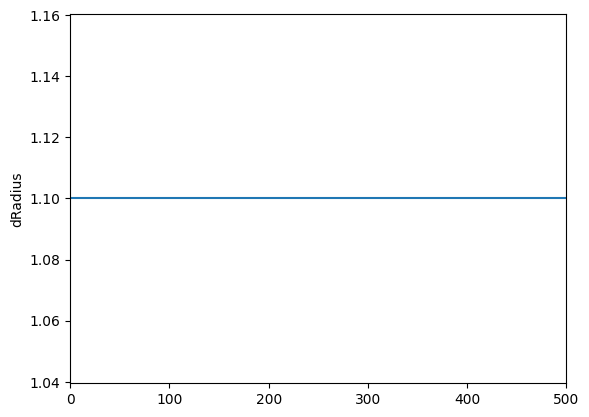

In [3]:
plt.plot((t),(np.array(xpnt)/Rsun))
# plt.plot(t,(np.array(xpnt)**2 * sigma * 5000**4))
plt.xlim(0,500)
# plt.plot(t,ypnt)
plt.ylabel('dRadius')